[FUENTE DE INFORMACION: - url: (https://archive.ics.uci.edu/ml/datasets/car+evaluation)](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)
1. [Estudiando el conjunto de Datos](#estudiando-los-datos)
    1. [Graficando las clases](#grafico-clases)
1. [Aplicando SMOTE](#aplicando-smote)
    1. [Aplicando SMOTE con las proportions modificadas](#aplicando-smote-proportion)
        1. [SMOTE IPF con proportion modificado](#smote-ipf-proportion0.7)
        1. [SMOTE ENN con proportion modificado](#smote-enn-proportion0.7)
        1. [SMOTE TOMEKLinks con proportion modificado](#smote-tomekLinks-proportion0.7)

<a id='estudiando-los-datos'></a>
## Estudiando el conjunto de Datos
[Inicio ▲](#Indice)

In [2]:
import pandas as pd
import category_encoders as ce 
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("car_evaluation.csv",header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data=data.replace({"unacc":0,"acc":1, "good":1, "vgood":1})

In [6]:
def show(data):
  for i in data.columns[1:]:
    print("Atributo: {} con Niveles : {} ".format(i,data[i].unique()))

show(data)

Atributo: maint con Niveles : ['vhigh' 'high' 'med' 'low'] 
Atributo: doors con Niveles : ['2' '3' '4' '5more'] 
Atributo: persons con Niveles : ['2' '4' 'more'] 
Atributo: lug_boot con Niveles : ['small' 'med' 'big'] 
Atributo: safety con Niveles : ['low' 'med' 'high'] 
Atributo: class con Niveles : [0 1] 


In [7]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class        int64
dtype: object

In [8]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,0
1,1,1,1,1,1,2,0
2,1,1,1,1,1,3,0
3,1,1,1,1,2,1,0
4,1,1,1,1,2,2,0


In [9]:
for col in col_names:
    print(data[col].value_counts())  

1    432
2    432
3    432
4    432
Name: buying, dtype: int64
1    432
2    432
3    432
4    432
Name: maint, dtype: int64
1    432
2    432
3    432
4    432
Name: doors, dtype: int64
1    576
2    576
3    576
Name: persons, dtype: int64
1    576
2    576
3    576
Name: lug_boot, dtype: int64
1    576
2    576
3    576
Name: safety, dtype: int64
0    1210
1     518
Name: class, dtype: int64


In [10]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
data['class'].value_counts()

0    1210
1     518
Name: class, dtype: int64

In [12]:
X = data.drop(['class'], axis=1)

y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1157, 6)
(571, 6)


In [13]:
print("inaceptable: {}".format(len(y[y==0])))
print("aceptable: {}".format(len(y[y==1])))

inaceptable: 1210
aceptable: 518


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [15]:
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
clasifier.score(X_test,y_test)

0.9369527145359019

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[392   5]
 [ 31 143]]


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       397
           1       0.97      0.82      0.89       174

    accuracy                           0.94       571
   macro avg       0.95      0.90      0.92       571
weighted avg       0.94      0.94      0.94       571



In [18]:
import seaborn as sns

<a id='grafico-clases'></a>
## Grafico de Clases
[Inicio ▲](#Indice)

Text(0.5, 1.0, 'Distribucion de clases sin aplicar SMOTE')

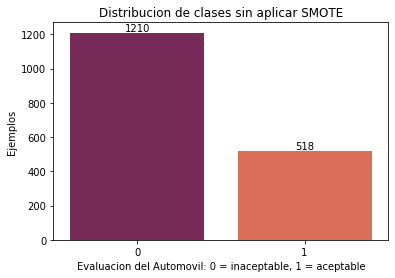

In [19]:
ax =  sns.countplot(x='class', data=data, palette='rocket')

abs_values = data['class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil: 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases sin aplicar SMOTE')

<a id='aplicando-smote'></a>
## Aplicando SMOTE
[Inicio ▲](#Indice)

In [20]:
import smote_variants as sv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [21]:
# oversampler= sv.SMOTE_TomekLinks()
# oversampler= sv.SMOTE_ENN()
oversampler= sv.SMOTE_IPF()
classifier= GaussianNB()
# classifier= RandomForestClassifier(random_state=42)
model= Pipeline([
                ('scale', StandardScaler()),
                ('clf', sv.OversamplingClassifier(oversampler, classifier))
            ])
model.fit(X_train, y_train)
param_grid= {'clf__oversampler':[sv.distance_SMOTE(proportion=0.2),
                                 sv.distance_SMOTE(proportion=0.3),
                                 sv.distance_SMOTE(proportion=0.4),
                                 sv.distance_SMOTE(proportion=0.5),
                                 sv.distance_SMOTE(proportion=0.6),
                                 sv.distance_SMOTE(proportion=0.7),
                                 sv.distance_SMOTE(proportion=0.8),
                                 sv.distance_SMOTE(proportion=0.9),
                                 sv.distance_SMOTE(proportion=1.0)]}
param_grid['clf__oversampler']

2022-05-22 15:30:30,113:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-05-22 15:30:30,114:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-05-22 15:30:30,148:INFO:SMOTE_IPF: Removing 0 elements
2022-05-22 15:30:30,172:INFO:SMOTE_IPF: Removing 0 elements
2022-05-22 15:30:30,193:INFO:SMOTE_IPF: Removing 0 elements


In [22]:
scoring = {"recall": "recall", "precision": "precision", "f1" : "f1"}
grid= GridSearchCV(model, param_grid= param_grid, cv= 3, n_jobs= 1, verbose= 2, scoring= scoring, refit='recall' ) #probar con lista ['f1','recall','precision']
grid.fit(X_train, y_train)

2022-05-22 15:30:30,292:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,311:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,329:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,362:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,393:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,423:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,447:INFO:dista

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 

2022-05-22 15:30:30,477:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,502:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,529:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,560:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,590:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,619:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,653:INFO:dista

[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-05-22 15:30:30,710:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,731:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,753:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,776:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,803:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,834:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,871:INFO:dista

[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf_

2022-05-22 15:30:30,910:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,945:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,971:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:30,998:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:31,032:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:31,062:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_IPF object at 0x000001EA9156F490>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001EAA35BD390>,
                                              <smote_variants._smote_va...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001EA9156EC80>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.01365829, 0.02232091, 0.01798956, 0.01911751, 0.02310689,
        0.01645056, 0.0242606 , 0.02636909, 0.02310046]),
 'std_fit_time': array([0.00169894, 0.00792583, 0.00081722, 0.00137249, 0.00176394,
        0.00071609, 0.00233301, 0.00396997, 0.00410156]),
 'mean_score_time': array([0.00533032, 0.00766174, 0.00599623, 0.00899879, 0.00699647,
        0.00466784, 0.00599678, 0.00666769, 0.00565998]),
 'std_score_time': array([4.70696366e-04, 9.42628497e-04, 1.41310002e-03, 9.27878906e-05,
        1.41416726e-03, 4.72113190e-04, 1.41371769e-03, 1.75861960e-03,
        4.69804776e-04]),
 'param_clf__oversampler': masked_array(data=[<smote_variants._smote_variants.distance_SMOTE object at 0x000001EAA35BD390>,
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__oversampler': <smote_variants._smote_variants.distance_SMOTE at 0x1eaa35bd390>},
  

In [24]:
datos = {'Recall' : grid.cv_results_['mean_test_recall'],
         'Precision' : grid.cv_results_['mean_test_precision'],
         'F1' : grid.cv_results_['mean_test_f1']}

df = pd.DataFrame(datos)

print(grid.get_params)
df

<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE_IPF object at 0x000001EA9156F490>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x000001EAA35BD390>,
                                              <smote_variants._smote_va...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x000001EA9156EC80>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)>


,Recall,Precision,F1
0,0.799517,0.869225,0.831903
1,0.825706,0.864432,0.843622
2,0.837274,0.859894,0.847414
3,0.872159,0.858851,0.864445
4,0.875032,0.836093,0.854160
5,0.898347,0.844229,0.869235
6,0.898322,0.833511,0.864227
7,0.909967,0.817256,0.860043
8,0.933155,0.815573,0.870102


<a id='aplicando-smote-proportion'></a>
## Aplicando SMOTE con las proportions modificadas
[Inicio ▲](#Indice)

In [25]:
import numpy as np

In [26]:
y_sinSmote = y.to_numpy()
print('majority class: %d' % np.sum(y_sinSmote == 0))
print('minority class: %d' % np.sum(y_sinSmote == 1))

majority class: 1210
minority class: 518


In [27]:
oversampler= sv.SMOTE(proportion=0.7)
X_samp, y_samp= oversampler.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

2022-05-22 15:30:31,578:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


majority class: 1210
minority class: 1002


In [28]:
dfSmote = pd.DataFrame(X_samp)
dfSmote = dfSmote.assign(col_class = y_samp)
dfSmote

,0,1,2,3,4,5,col_class
0,1.0,1.0,1.000000,1.0,1.00000,1.000000,0
1,1.0,1.0,1.000000,1.0,1.00000,2.000000,0
2,1.0,1.0,1.000000,1.0,1.00000,3.000000,0
3,1.0,1.0,1.000000,1.0,2.00000,1.000000,0
4,1.0,1.0,1.000000,1.0,2.00000,2.000000,0
...,...,...,...,...,...,...,...
2207,4.0,2.0,2.687312,2.0,2.00000,3.000000,1
2208,3.0,3.0,1.000000,2.0,3.00000,2.134215,1
2209,3.0,2.0,2.067005,3.0,2.00000,2.000000,1
2210,3.0,2.0,4.000000,2.0,2.00000,2.879787,1


In [29]:
dfSmote

,0,1,2,3,4,5,col_class
0,1.0,1.0,1.000000,1.0,1.00000,1.000000,0
1,1.0,1.0,1.000000,1.0,1.00000,2.000000,0
2,1.0,1.0,1.000000,1.0,1.00000,3.000000,0
3,1.0,1.0,1.000000,1.0,2.00000,1.000000,0
4,1.0,1.0,1.000000,1.0,2.00000,2.000000,0
...,...,...,...,...,...,...,...
2207,4.0,2.0,2.687312,2.0,2.00000,3.000000,1
2208,3.0,3.0,1.000000,2.0,3.00000,2.134215,1
2209,3.0,2.0,2.067005,3.0,2.00000,2.000000,1
2210,3.0,2.0,4.000000,2.0,2.00000,2.879787,1


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE \n con un proportion = 0.7')

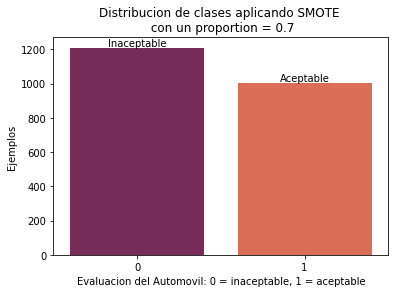

In [49]:
ax =  sns.countplot(x='col_class', data=dfSmote, palette='rocket')

abs_values = dfSmote['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil: 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE \n con un proportion = 0.7')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[360  43]
 [  0 327]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       403
           1       0.88      1.00      0.94       327

    accuracy                           0.94       730
   macro avg       0.94      0.95      0.94       730
weighted avg       0.95      0.94      0.94       730



<a id='smote-ipf-proportion0.7'></a>
## SMOTE IPF con proportion modificado
[Inicio ▲](#Indice)

In [32]:
oversampler_ipf= sv.SMOTE_IPF(proportion=0.7)
X_ipf, y_ipf= oversampler_ipf.sample(X.to_numpy(), y.to_numpy())

2022-05-22 15:30:32,205:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 0.7, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2022-05-22 15:30:32,207:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-05-22 15:30:32,235:INFO:SMOTE_IPF: Removing 0 elements
2022-05-22 15:30:32,256:INFO:SMOTE_IPF: Removing 0 elements
2022-05-22 15:30:32,275:INFO:SMOTE_IPF: Removing 0 elements


In [33]:
print('majority class: %d' % np.sum(y_ipf == 0))
print('minority class: %d' % np.sum(y_ipf == 1))

majority class: 1210
minority class: 1002


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE IPF \n con un proportion = 0.7')

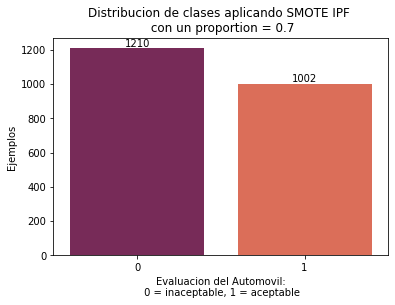

In [51]:
dfSmoteIPF = pd.DataFrame(X_ipf)
dfSmoteIPF = dfSmoteIPF.assign(col_class = y_ipf)
dfSmoteIPF
ax =  sns.countplot(x='col_class', data=dfSmoteIPF, palette='rocket')

abs_values = dfSmoteIPF['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE IPF \n con un proportion = 0.7')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_ipf, y_ipf, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[363  40]
 [  0 327]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       403
           1       0.89      1.00      0.94       327

    accuracy                           0.95       730
   macro avg       0.95      0.95      0.95       730
weighted avg       0.95      0.95      0.95       730



<a id='smote-enn-proportion0.7'></a>
## SMOTE ENN con proportion modificado
[Inicio ▲](#Indice)

In [36]:
oversampler_enn= sv.SMOTE_ENN(proportion=0.5)
X_enn, y_enn= oversampler_enn.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_enn == 0))
print('minority class: %d' % np.sum(y_enn == 1))

2022-05-22 15:30:32,812:INFO:SMOTE_ENN: Running sampling via ('SMOTE_ENN', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:32,813:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-05-22 15:30:32,822:INFO:EditedNearestNeighbors: Running noise removal via EditedNearestNeighbors


majority class: 1207
minority class: 810


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE ENN \n con un proportion = 0.5')

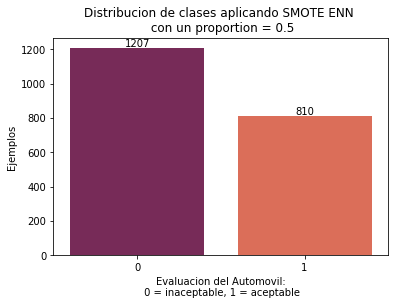

In [52]:
dfSmoteENN = pd.DataFrame(X_enn)
dfSmoteENN = dfSmoteENN.assign(col_class = y_enn)
dfSmoteENN
ax =  sns.countplot(x='col_class', data=dfSmoteENN, palette='rocket')

abs_values = dfSmoteENN['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE ENN \n con un proportion = 0.5')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_enn, y_enn, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[367  29]
 [ 10 260]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       396
           1       0.90      0.96      0.93       270

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666



<a id='smote-tomekLinks-proportion0.7'></a>
## SMOTE TOMEKLinks con proportion modificado
[Inicio ▲](#Indice)

In [39]:
oversampler_klinks= sv.SMOTE_TomekLinks(proportion=0.2)
X_tklinks, y_tklinks= oversampler_klinks.sample(X.to_numpy(), y.to_numpy())
print('majority class: %d' % np.sum(y_tklinks == 0))
print('minority class: %d' % np.sum(y_tklinks == 1))

2022-05-22 15:30:33,384:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-05-22 15:30:33,385:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from 'C:\\\\Users\\\\FamiliaNatelloMedina\\\\AppData\\\\Roaming\\\\Python\\\\Python310\\\\site-packages\\\\numpy\\\\random\\\\__init__.py'>}")
2022-05-22 15:30:33,392:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


majority class: 1210
minority class: 656


Text(0.5, 1.0, 'Distribucion de clases aplicando SMOTE Tomek-links \n con un proportion = 0.2')

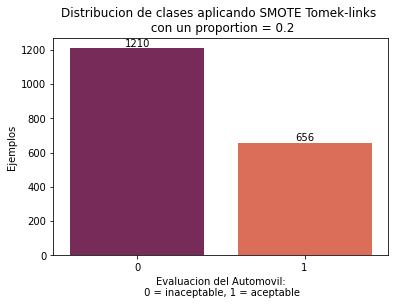

In [53]:
dfSmoteTKLinks = pd.DataFrame(X_tklinks)
dfSmoteTKLinks = dfSmoteTKLinks.assign(col_class = y_tklinks)
dfSmoteTKLinks
ax =  sns.countplot(x='col_class', data=dfSmoteTKLinks, palette='rocket')

abs_values = dfSmoteTKLinks['col_class'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Evaluacion del Automovil:\n 0 = inaceptable, 1 = aceptable')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases aplicando SMOTE Tomek-links \n con un proportion = 0.2')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_tklinks, y_tklinks, test_size= 0.33, random_state=42)
clasifier = RandomForestClassifier(max_depth=3, random_state=0)

# fit the model

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[395  14]
 [  8 199]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       409
           1       0.93      0.96      0.95       207

    accuracy                           0.96       616
   macro avg       0.96      0.96      0.96       616
weighted avg       0.96      0.96      0.96       616



Text(30.5, 0.5, 'true')

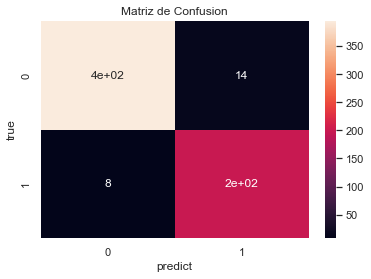

In [57]:
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('Matriz de Confusion') #título
ax.set_xlabel('Predicciones') #eje x
ax.set_ylabel('true') #eje y